In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [13]:
df=pd.read_csv('train.csv')

In [14]:
!pip uninstall -y pandas-profiling

In [15]:
%pip install ydata-profiling


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install pydantic-settings


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline
sns.set(color_codes=True)

In [18]:
profile=ProfileReport(df, title="dataset",html={'style':{'full width':True}}, sort="Ascending")

In [44]:
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_1881/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [23]:
df['Cabin'].fillna('Unknown', inplace=True)

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_1881/876187935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


In [24]:
mode_embarked = df['Embarked'].mode()[0]
print(f'The mode of Embarked is: {mode_embarked}')

The mode of Embarked is: S


In [25]:
df['Embarked'].fillna(mode_embarked, inplace=True)

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_1881/2444861502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

in order to get rid of multiple columns we make a custom column with family size and then we remove sib and parch

In [28]:
df['Family_Size'] = df.SibSp + df.Parch + 1

In [29]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Family_Size  
0      0         A/5 21171   7.2500  Unknown        S            2  
1      0          PC 17599  71.2833      C85        C            2  
2      0  STON/O2. 3101282   7.9250  Unknown        S            1  
3      0            113803  53.1000     C123        S            2  
4      0            373450   8.0500  Unknown        S            1

dummy encoding - converting male female to 1 and 0

and
*   P   C   Q

*   1   0   0
*   0   1   0
*   0   0   1

only used for small number of columns so as to not introduce noise

In [30]:
sex = pd.get_dummies(df.Sex, drop_first=True)
embark = pd.get_dummies(df.Embarked)

drop first is used so that there is only one column unlike in embark where the drop column is not used so there are three columns

In [45]:
sex = sex.astype(int)
embark = embark.astype(int)

In [32]:
df = pd.concat([df, sex, embark], axis = 1)

axis 1 is used for columns and axis 0 is used for rows

In [33]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Family_Size  male  C  \
0      0         A/5 21171   7.2500  Unknown        S            2     1  0   
1      0          PC 17599  71.2833      C85        C            2     0  1   
2      0  STON/O2. 3101282   7.9250  Unknown        S            1     0  0   
3      0            113803  53.1000     C123        S            2     0  0   
4      0            373450   8.0500  Unknown        S            1     1  0   

   Q  S  
0  0  1  
1  0  0  
2  0  1  
3  0  1  
4  0  1

In [34]:
df.shape

(891, 17)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_Size  891 non-null    int64  
 13  male         891 non-null    int64  
 14  C            891 non-null    int64  
 15  Q            891 non-null    int64  
 16  S            891 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 118.5+ KB


In [36]:
df.drop(['Ticket', 'Name', 'Sex', 'Cabin', 'SibSp', 'PassengerId', 'Embarked'], axis = 1, inplace= True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Family_Size  891 non-null    int64  
 6   male         891 non-null    int64  
 7   C            891 non-null    int64  
 8   Q            891 non-null    int64  
 9   S            891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


<Axes: >

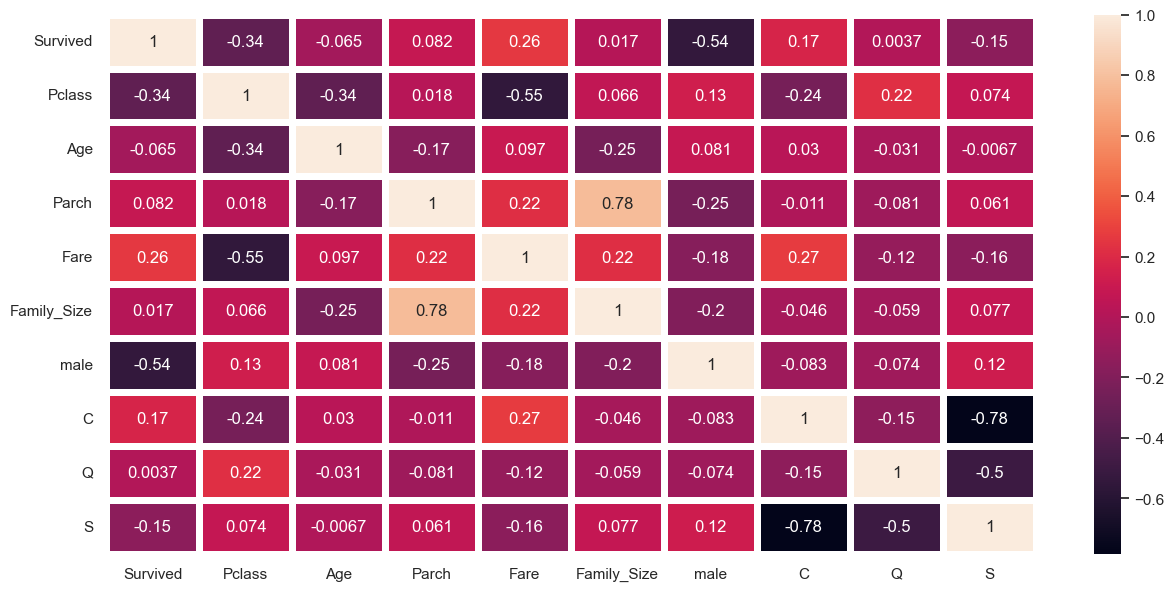

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), linewidth = 5, annot = True)

In [39]:
df.corr()

Survived    Pclass       Age     Parch      Fare  Family_Size  \
Survived     1.000000 -0.338481 -0.064910  0.081629  0.257307     0.016639   
Pclass      -0.338481  1.000000 -0.339898  0.018443 -0.549500     0.065997   
Age         -0.064910 -0.339898  1.000000 -0.172482  0.096688    -0.245619   
Parch        0.081629  0.018443 -0.172482  1.000000  0.216225     0.783111   
Fare         0.257307 -0.549500  0.096688  0.216225  1.000000     0.217138   
Family_Size  0.016639  0.065997 -0.245619  0.783111  0.217138     1.000000   
male        -0.543351  0.131900  0.081163 -0.245489 -0.182333    -0.200988   
C            0.168240 -0.243292  0.030248 -0.011069  0.269335    -0.046215   
Q            0.003650  0.221009 -0.031415 -0.081228 -0.117216    -0.058592   
S           -0.149683  0.074053 -0.006729  0.060814 -0.162184     0.077359   

                 male         C         Q         S  
Survived    -0.543351  0.168240  0.003650 -0.149683  
Pclass       0.131900 -0.243292  0.221009  0.074053  
Age          0.081163  0.030248 -0.031415 -0.006729  
Parch       -0.245489 -0.011069 -0.081228  0.060814  
Fare        -0.182333  0.269335 -0.117216 -0.162184  
Family_Size -0.200988 -0.046215 -0.058592  0.077359  
male         1.000000 -0.082853 -0.074115  0.119224  
C           -0.082853  1.000000 -0.148258 -0.782742  
Q           -0.074115 -0.148258  1.000000 -0.499421  
S            0.119224 -0.782742 -0.499421  1.000000

In [40]:
X = df.drop('Survived', axis = 1)
y = df.Survived

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [43]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
y_pred = kNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[90 15]
 [35 39]]


In [ ]:
knn_acc = round(accuracy_score(y_test, y_pred), 3)
print(knn_acc)

0.721


In [ ]:
print(precision_score(y_test, y_pred))

0.7222222222222222


In [ ]:
print(recall_score(y_test, y_pred))

0.527027027027027
